In [2]:
%load_ext autoreload
%autoreload 2

import sys
import os
import scipy as sp
import sklearn
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import axes3d
from mpl_toolkits.mplot3d.art3d import Line3DCollection
from mpl_toolkits.mplot3d.proj3d import proj_transform
from matplotlib.text import Annotation

sys.path.insert(1, os.path.join(sys.path[0], ".."))
from reproduction import analysis
from reproduction.models import autoencoder
from reproduction.pipeline.load import load_data

/anaconda3/envs/clouds/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/envs/clouds/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/envs/clouds/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/envs/clouds/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [10]:
model_dir = "../output/mod09cnn15/"

encoder, decoder = autoencoder(shape=(None, None, 7), data_format="channels_last")

encoder.load_weights(model_dir + "encoder.h5")
decoder.load_weights(model_dir + "decoder.h5")

In [11]:
SHAPE = 128, 128, 7
data = analysis.AEData(load_data("../data/tif/*.tfrecord", SHAPE, flips=False), n=1000)

In [12]:
data.raw_encs = encoder.predict(data.imgs)
data.ae_imgs = decoder.predict(data.raw_encs)

# Convex Hull for Archetypal Analysis

Look at the edge points of the 3d pca plot to hopefully understand the space

In [13]:
data.encs = data.raw_encs.mean(axis=(1,2))
pca3 = data.pca_project(data.encs, 3)
hull = sp.spatial.ConvexHull(data.pca_project(data.encs, 3).T)

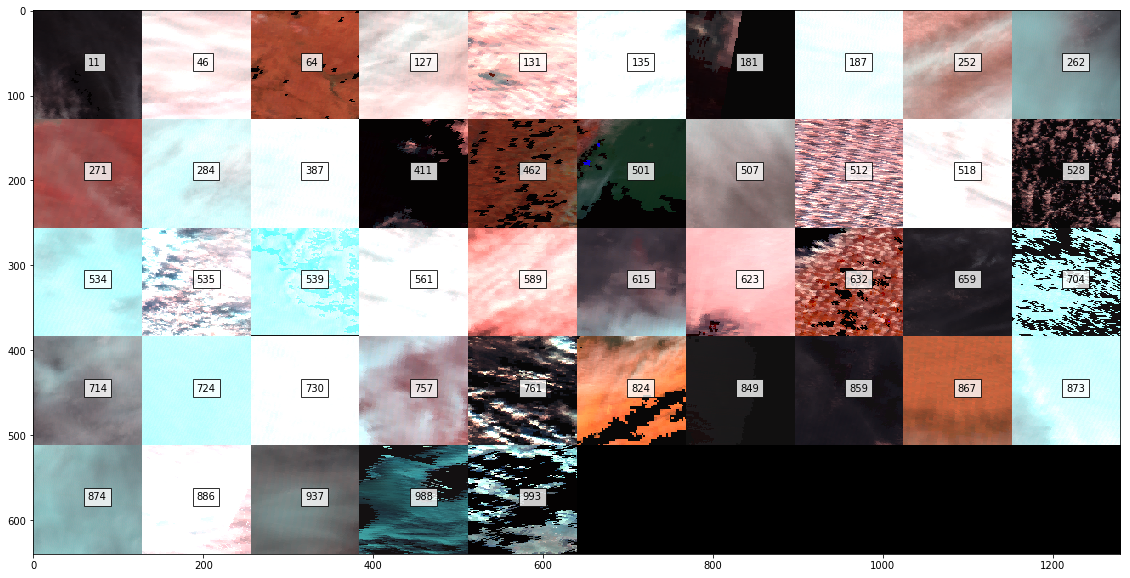

In [14]:
%matplotlib inline
nrows, ncols, fsize = 5, 10, 2

plt.figure(figsize=(fsize * ncols, fsize * nrows))
height, width, _ = SHAPE

vertices = sorted(hull.vertices)
assert len(vertices) <= nrows * ncols

canvas = np.zeros((nrows * height, ncols * width, 3))
for i in range(nrows):
    for j in range(ncols):
        if i * ncols + j >= len(vertices):
            break
        v = vertices[i * ncols + j]
        canvas[i * height: (i+1) * height, j * width: (j+1) * width] = data.colored_imgs[v]
        plt.text(
            j * height + height / 2,
            i * width + width / 2,
            str(v),
            bbox=dict(facecolor='white', alpha=0.8)
        )

plt.imshow(canvas)

<IPython.core.display.Javascript object>


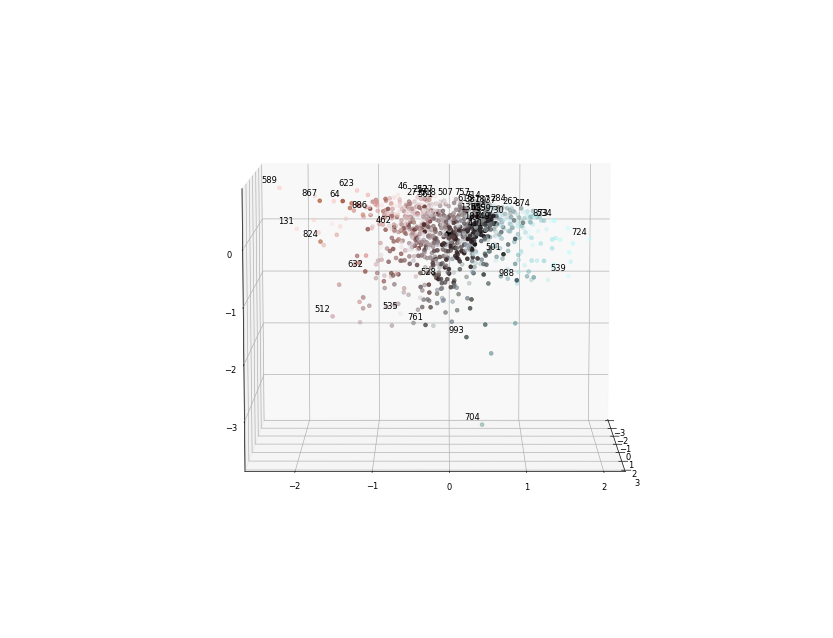

In [73]:
% matplotlib notebook
% matplotlib notebook
% matplotlib notebook
% matplotlib notebook
% matplotlib notebook
% matplotlib notebook
% matplotlib notebook
% matplotlib notebook
% matplotlib notebook
% matplotlib notebook
% matplotlib notebook
% matplotlib notebook
% matplotlib notebook
% matplotlib notebook
% matplotlib notebook
% matplotlib notebook

class Annotation3D(Annotation):
    '''Annotate the point xyz with text s'''
    def __init__(self, s, xyz, *args, **kwargs):
        Annotation.__init__(self,s, xy=(0,0), *args, **kwargs)
        self._verts3d = xyz        
    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.xy=(xs,ys)
        Annotation.draw(self, renderer)
        
def annotate3D(ax, s, *args, **kwargs):
    '''add anotation text s to to Axes3d ax'''
    tag = Annotation3D(s, *args, **kwargs)
    ax.add_artist(tag)
    
# create figure        
fig = plt.figure(dpi=60, figsize=(8, 8))
ax = fig.gca(projection='3d')
ax.scatter(
    *pca3,
    color=data.colored_imgs.mean(axis=(1,2)),
)
ax.scatter(0,0,0, color="black", marker="D", s=100)

for v in hull.vertices: 
    annotate3D(
        ax, s=str(v), xyz=pca3[:,v], fontsize=10, 
        xytext=(-3,3), textcoords='offset points',
        ha='right',va='bottom'
    )    

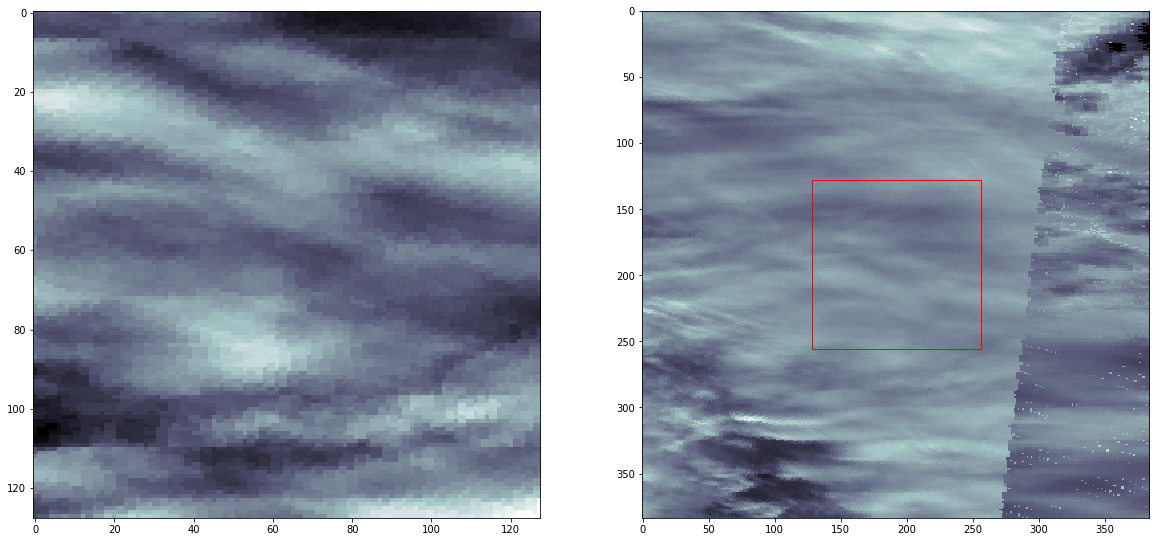

In [80]:
%matplotlib inline
data.plot_neighborhood(46)